# Generative Models

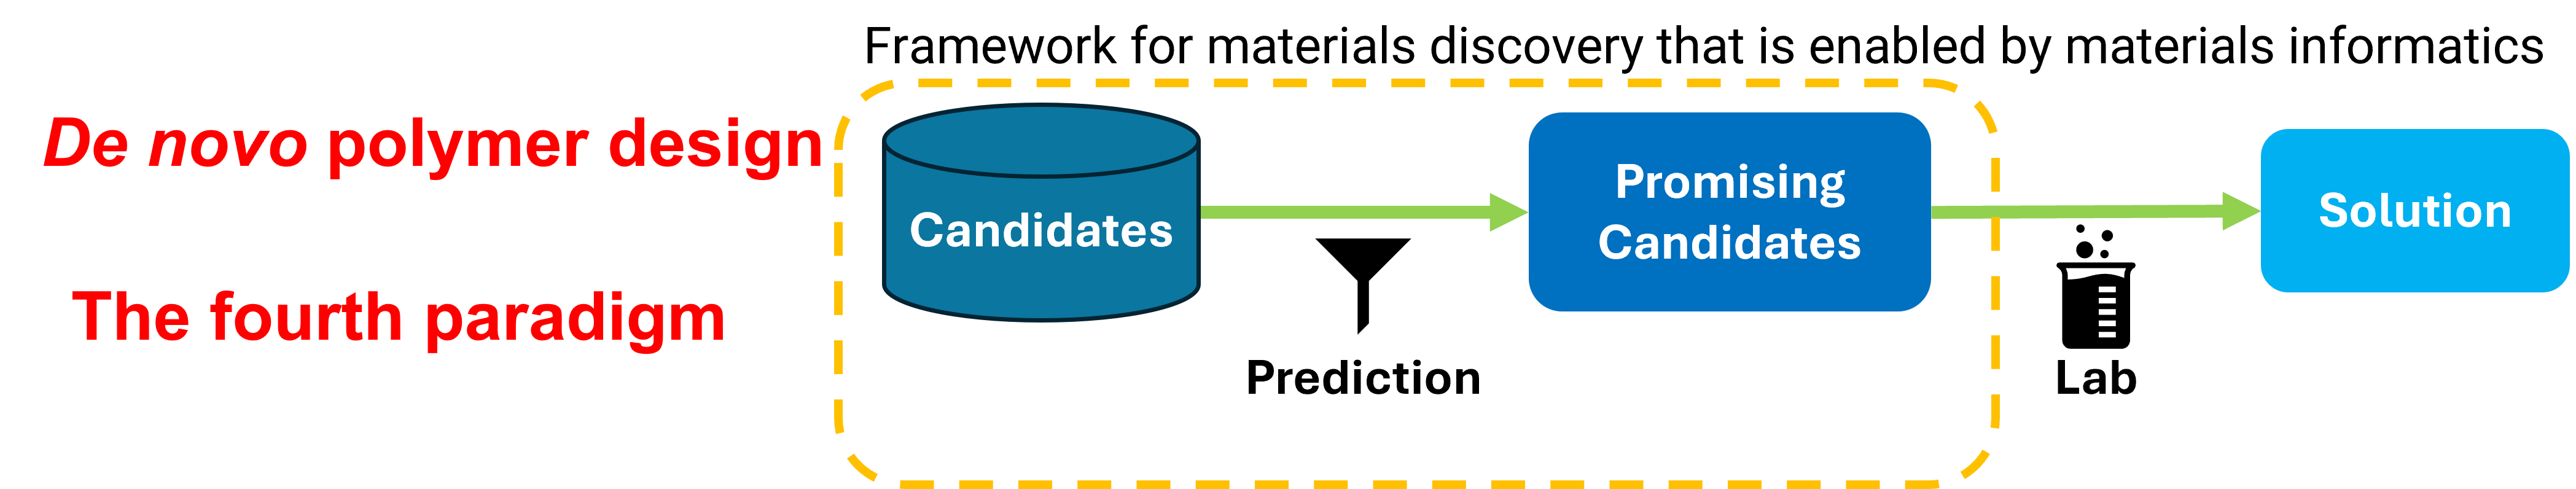

In the preceding sections, we've explored the utilization of ML techniques for predicting polymer properties, aiding in the identification of promising structures among a large pool of candidates. However, this premise relies on the existence of initial candidates.
Various methods exist for obtaining candidate polymer structures for research, with the simplest being the utilization of existing real polymer structures. Nevertheless, the availability of these structures is notably limited, rendering it an inadequate choice when seeking new polymers with superior properties compared to existing ones. In such cases, ML, particularly generative models, can assist in producing new hypothetical polymer structures as candidates.

It's imperative to note that this task isn't straightforward, as our ultimate goal is to synthesize high-performance polymer materials in the real world. Therefore, generated hypothetical polymers must adhere to various physical and chemical rules governing the real world. Additionally, we aim for these structures to closely resemble existing polymer structures while possessing favorable properties, such as a high Tg for  improved thermal stability, facilitating easier identification of synthesis pathways.


It’s important to note that generative models are typically quite complex and require significant computational resources. Therefore, it's not recommended to train or use them on Jupyter Notebook or Google Colab. Instead, here are a few GitHub repositories for generative models. If you want to try them out, it’s advisable to use a server with GPUs and Docker.

https://github.com/molecularsets/moses?tab=readme-ov-file

https://github.com/MolecularAI/Reinvent

https://github.com/MolecularAI/GraphINVENT

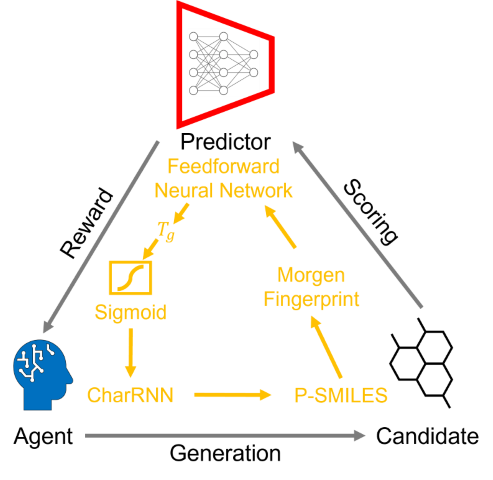

Here, we will use a CharRNN combined with reinforcement learning as an example to generate some hypothetical brand new polymer structures with high $T_g$ values. The choice of CharRNN is based on two reasons: first, it delivers good performance, and second, the RNN network structure is relatively simple, making it less demanding on hardware resources.

# Google Colab Specific Setup

## For getting files on Googl Drive and to Open in Colab

First download the files from the lab and uploade them to google drive near the top level. Then go to this folder in your browser and click on column of dots to the right of the *.ipynb file. Select "Open With". If "Google Collaboratory" appears choose it. If it does not appear go to the bottom of the list and choose "Connect more apps" and then install "Google Collaboratory". Close browser, reopen, and try again. Now "Google Collaboratory" should appear when you select "Open With". You should also just be able to double click on the *.ipynb file.

First, you'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

This cell links your Google drive to the Colab session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Here, modify the path where you saved this notebook and the associated lab files on your Google drive. This can be obtained in colab

In [ ]:
path = '/content/drive/MyDrive/SPE/'

Check the path name is assigned correctly.

In [ ]:
!echo $path
import os
os.path.isdir(path)

/content/drive/MyDrive/SPE/


True

In [ ]:
# This is needed so can import packages from a different path than standard libraries
import sys
sys.path.append(path)

Check the Python packages that are available by default in the Colab environment.

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
accelerate                       0.32.1
aiohappyeyeballs                 2.4.0
aiohttp                          3.10.5
aiosignal                        1.3.1
alabaster                        0.7.16
albucore                         0.0.13
albumentations                   1.4.14
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.18.0
asn1crypto                       1.5.1
astropy                          6.1.2
astropy-iers-data                0.2024.8.26.0.31.57
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            24.2.0
audioread              

Need to install some python packages which is not present on Colab environement by default. For pytorch 2.1.2 You must restart the runtime in order to use newly installed versions.

In [ ]:
!pip install rdkit
!pip install torch==2.1.0 torchaudio==2.1.0 torchvision==0.16.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0

# Establish and train the predictor

Authors: Tianle Yue, Laboratory for Polymer Difital Engineering, University of Wisconsin–Madison.

This lab introduces students to an end-to-end example of applying a machine learning (ML) workflow to a polymer informatic dataset to address a research problem. The lab aims at deepening the conceptual understanding of ML, and while procedural skills such as writing Python code are not the focus of this lab, students will gain experience with a number of standard open source packages by interacting with code snippets through the Jupyter Notebook format and describing what each essential command does.

If you're unfamiliar with Jupyter Notebooks, take a moment to read about the lesson format.

## Jupyter Notebook Tips and Tricks

#### Cells
Each individual part of this notebook is known as a cell. The orange highlight bar along the left edge of this page indicates which cell is active.

#### Moving between active cells
You can move between cells by hitting the `up` and `down` arrows or by clicking on the cell you want to focus on. The `up` and `down` arrow keys will only move you between cells when you are not in edit mode.

#### Edit mode
Hit the `enter` key on the active cell to "enter" it and edit its contents. While in edit mode, the `up` and `down` arrow keys will not move you between cells. Double clicking a cell will also enable edit mode.

#### Running a cell
Hit `shift + enter` to run the active cell. In a code cell, the code will run and if there is output, it will be displayed immediately below the code cell. In a markdown cell, the markdown will be rendered. Running a cell will automatically make the following cell the new active cell.

####  Exit edit mode
If you're editing a cell and want to exit edit mode, hit the `esc` key. This will exit edit mode, but the current cell will still be the active cell. This action will not run the cell. It will enable you to use the `up` and `down` arrow keys to move between cells again.

#### Adding a cell
When you're not in edit mode, hit `b` to add a new cell. The new cell will be added directly below the active cell.

#### Deleting a cell
When you're not in edit mode, hit `x` to delete the active cell.

#### Switching between markdown and code
When you're not in edit mode, you can convert a code cell to a markdown cell by hitting the `m` key, and convert a markdown cell to a code cell by hitting the `c` key.

## Background

### Glass transition temperature

The glass-transition temperature $T_g$ of a material characterizes the range of temperatures over which this glass transition occurs (as an experimental definition, typically marked as 100 s of relaxation time). It is always lower than the melting temperature, $T_m$, of the crystalline state of the material, if one exists, because the glass is a higher energy state (or enthalpy at constant pressure) than the corresponding crystal.

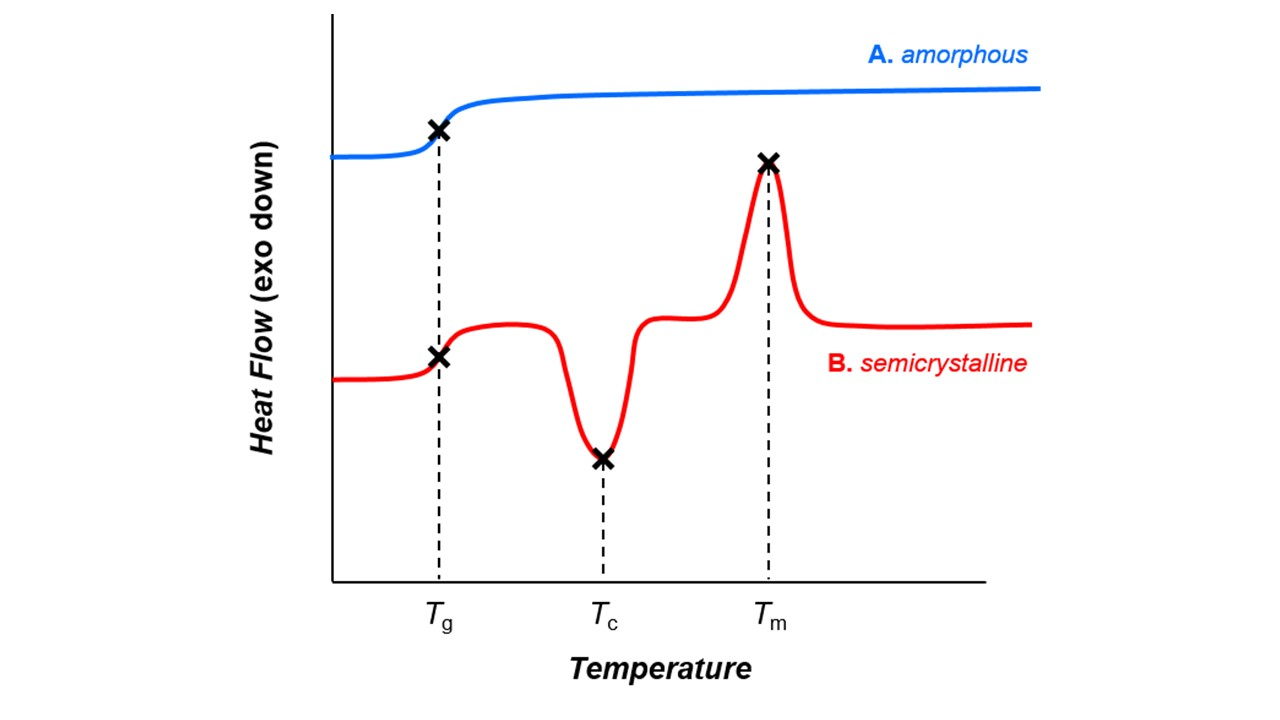

Typical Differential Scanning Calorimeter (DSC) heat flow for an amorphous and a semi-crystalline polymer (exothermic). With the help of DSC it is possible to determine thermal transitions of polymers in a range of temperatures between –180 and +600 °C.


### Glass transition temperature Dataset

The Glass transition temperature dataset used in this study was collected from the PolyInfo dataset (https://polymer.nims.go.jp/). Polymer Database "PoLyInfo" systematically provides various data required for polymeric material design. The main data source is academic literature on polymers. To access the PolyInfo dataset, the domain name of your email address must be registered in our management list.

The reason for using Tg as an example is twofold: first, this property is extremely important for polymer materials, and second, there are many samples available to train our network. This makes training the network less challenging, making it an excellent starting point for learning the integration of ML and polymer informatics.

## Using supervised learning to predict polymer peoperties

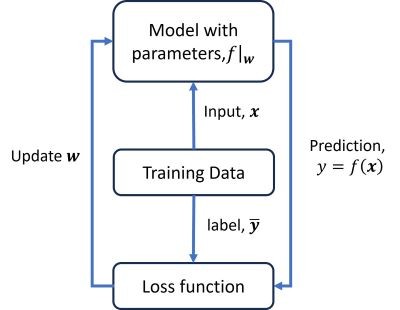

When using ML models to predict polymer properties, supervised learning is generally employed. In supervised learning, models are trained using pre-collected data. This training process relies on labeled data, where each data point is associated with a corresponding outcome. By training on this labeled dataset, a supervised ML model learns to map input data to expected outputs.

### Setpu Machine Learning Model

#### Fitting and Evaluating a Feedforward Neural Network

A feedforward neural network (FNN) is one of the two broad types of artificial neural network, characterized by direction of the flow of information between its layers. Its flow is uni-directional, meaning that the information in the model flows in only one direction—forward—from the input nodes, through the hidden nodes (if any) and to the output nodes, without any cycles or loops. Modern feedforward networks are trained using the backpropagation method.

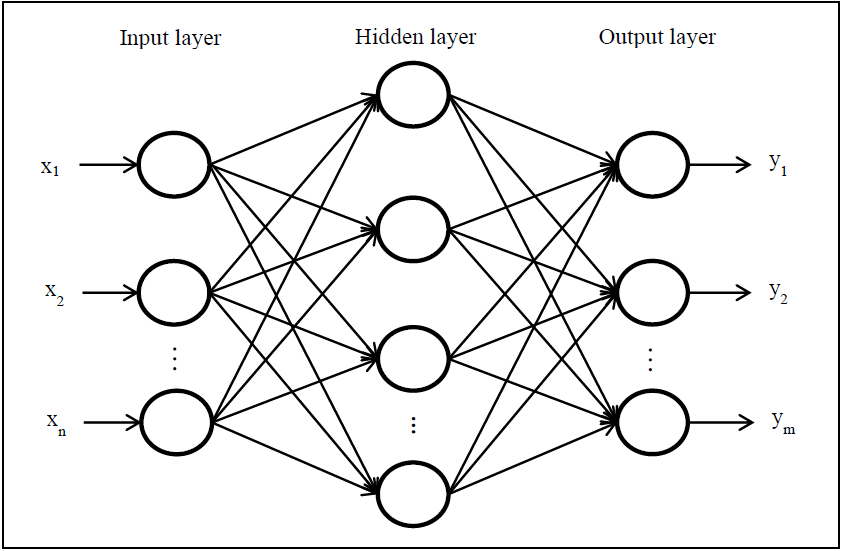

## Define fitness function from tartarus

In [ ]:
import sys, os
ROOT_DIR = '..'
sys.path.append(ROOT_DIR)
sys.path.append('hill-climbing-lstm')

from tartarus import pce
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from rdkit import Chem
from rdkit.Chem import AllChem
import math

class FFNN(nn.Module):
    def __init__(self):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(1024, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 2048)
        self.fc4 = nn.Linear(2048, 512)
        self.fc5 = nn.Linear(512, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

model = FFNN()

def fitness_function(smi: str):
    try:
        mol = Chem.MolFromSmiles(smi)
        fn = AllChem.GetMorganFingerprintAsBitVect(mol, radius=3, nBits=1024)
    except:
        return 0
    loaded_model = FFNN()
    loaded_model.load_state_dict(torch.load(path+'Tg.pth'))

    loaded_model.eval()

    new_inputs = torch.tensor(fn, dtype=torch.float32)

    with torch.no_grad():
        predictions = loaded_model(new_inputs)
    value = predictions.item()
    score = 1 / (1 + math.exp(-0.014391156900419547 * (value - 200)))
    return value

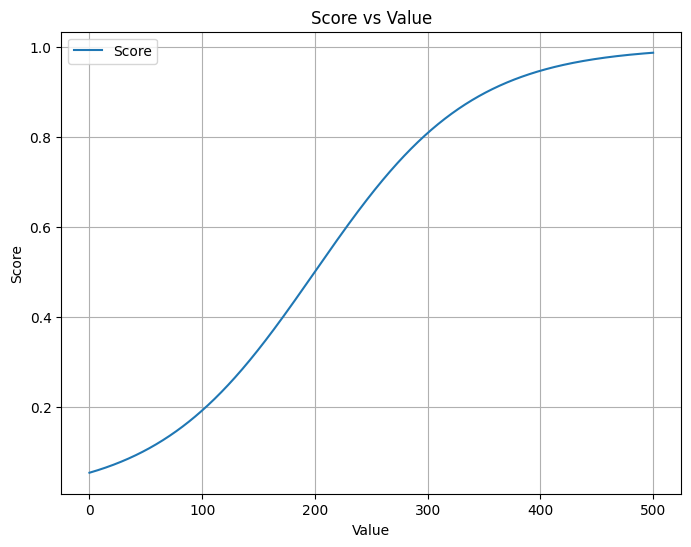

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
# Define the function
def compute_score(value):
    return 1 / (1 + math.exp(-0.014391156900419547 * (value - 200)))

# Generate a range of values
values = np.linspace(0, 500, 1000)  # Adjust the range as needed
scores = [compute_score(value) for value in values]

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(values, scores, label='Score')
plt.xlabel('Value')
plt.ylabel('Score')
plt.title('Score vs Value')
plt.grid(True)
plt.legend()
plt.show()

## Pre-train a CharRNN



In [ ]:
!pip install pytorch_lightning==1.9.0
!pip install torchmetrics==0.5.0
!pip install selfies

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.8/825.8 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.0/272.0 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: torchmetrics
    Found existing installation: torchmetrics 1.4.1
    Uninstalling torchmetrics-1.4.1:
      Successfully uninstalled torchmetrics-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytorch-lightning 1.9.0 requires torchmetrics>=0.7.0, but you have torchmetrics 0.5.0 which is incompatible.


If you encounter the error `ImportError: cannot import name 'Callable' from 'collections'` please update the code by replacing `from collections import Callable` with `from collections.abc import Callable`.

In [ ]:
import os

import torch
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint
from pytorch_lightning.loggers import CSVLogger

import rdkit.Chem as Chem
import selfies as sf
import pandas as pd
import numpy as np

from lstm_climber import SELFIESDataModule, SMILESDataModule, LanguageModel
from lstm_climber.datamodules import SMILESDataset
import lstm_climber.utils as utils


Get the training parameters and dataset

In [ ]:
# define parameters
data_path       = os.path.join(path, 'PolyInfo.csv')
string_type     = 'smiles' # 'smiles'
num_workers     = 6

# get the data
#smi_list, sfs_list = utils.get_lists(data_path, sep='\n', header='infer', smiles_name='smiles')
smi_list = pd.read_csv(data_path)['smiles']
if string_type == 'selfies':
    str_list = sfs_list
    dm = SELFIESDataModule(str_list, batch_size = 128, num_workers = num_workers)
elif string_type == 'smiles':
    str_list = smi_list
    dm = SMILESDataModule(str_list, batch_size = 128, num_workers = num_workers)
else:
    raise ValueError('No such string representation.')

# print some stuff about the data
print(f'You are using the "{string_type}" representation.')
print(f'Number of molecules: {len(str_list)}')
print(f'Length of longest molecule: {dm.len_molecule}')
print(f'Length of alphabet: {dm.len_alphabet}')
print(f'Alphabet: {dm.alphabet}')


You are using the "smiles" representation.
Number of molecules: 12841
Length of longest molecule: 306
Length of alphabet: 49
Alphabet: ['#', '%', '(', ')', '*', '+', '-', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'B', 'C', 'F', 'G', 'H', 'I', 'K', 'L', 'N', 'O', 'P', 'S', 'T', 'Z', '[', '\\', ']', 'a', 'b', 'c', 'd', 'e', 'i', 'l', 'n', 'o', 'r', 's', ' ']


Train the language model

Here, we set `max_epochs = 5` because training generative models requires significant computational resources. As it turned out, a network trained for only 5 epochs was not usable, and `max_epochs = 70` is a more reasonable setting. In the subsequent reinforcement learning section, we will use a pre-trained model from the server, which was trained for 63 epochs.

In [ ]:
# create model
model = LanguageModel(1024, 3, dm.len_alphabet, dm.len_molecule)

# default logger used by trainer
logger = CSVLogger(os.path.join(os.getcwd(), 'trained_models'), name=string_type)

callbacks = [
    ModelCheckpoint(dirpath = logger.log_dir, filename = 'final_model', monitor = 'val_loss', mode = 'min', verbose=True),
    EarlyStopping(monitor='val_loss', patience=20, mode='min', verbose=True)
]

trainer = pl.Trainer(
    accelerator = 'gpu',
    devices=1,
    logger=logger,
    max_epochs = 5,
    callbacks = callbacks,
)
trainer.fit(model, dm)
print('Finished training!')

metrics = utils.plot_metrics(os.path.join(logger.log_dir, 'metrics.csv'), logger.log_dir)

print('Done!')

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | lstm          | LSTM             | 21.2 M
1 | linear        | Linear           | 50.2 K
2 | loss_fn       | CrossEntropyLoss | 0     
3 | train_vae_acc | Accuracy         | 0     
4 | val_vae_acc   | Accuracy         | 0     
---------------------------------------------------
21.2 M    Trainable params
0         Non-trainable params
21.2 M    Total params
84.988    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 0        validation loss: 3.9101712703704834


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved. New best score: 0.659
INFO:pytorch_lightning.utilities.rank_zero:Epoch 0, global step 81: 'val_loss' reached 0.65866 (best 0.65866), saving model to '/content/trained_models/smiles/version_0/final_model.ckpt' as top 1


Epoch: 0        validation loss: 0.6544244885444641


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.034 >= min_delta = 0.0. New best score: 0.625
INFO:pytorch_lightning.utilities.rank_zero:Epoch 1, global step 162: 'val_loss' reached 0.62467 (best 0.62467), saving model to '/content/trained_models/smiles/version_0/final_model.ckpt' as top 1


Epoch: 1        validation loss: 0.620803952217102


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.013 >= min_delta = 0.0. New best score: 0.612
INFO:pytorch_lightning.utilities.rank_zero:Epoch 2, global step 243: 'val_loss' reached 0.61159 (best 0.61159), saving model to '/content/trained_models/smiles/version_0/final_model.ckpt' as top 1


Epoch: 2        validation loss: 0.6077431440353394


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.030 >= min_delta = 0.0. New best score: 0.581
INFO:pytorch_lightning.utilities.rank_zero:Epoch 3, global step 324: 'val_loss' reached 0.58134 (best 0.58134), saving model to '/content/trained_models/smiles/version_0/final_model.ckpt' as top 1


Epoch: 3        validation loss: 0.5804761648178101


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.579
INFO:pytorch_lightning.utilities.rank_zero:Epoch 4, global step 405: 'val_loss' reached 0.57881 (best 0.57881), saving model to '/content/trained_models/smiles/version_0/final_model.ckpt' as top 1


Epoch: 4        validation loss: 0.577442467212677


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


Finished training!
Metrics plotted!
Done!


Reinforcement Learning parameters, load in pretrained model

In [ ]:
# define parameters
#model_path      = /content/trained_models/smiles/version_0/final_model.ckpt
model_path      = path+'/version_0/final_model.ckpt'
out_path       = 'RESULTS_retrain_{string_type}_PI'
num_workers     = 6

# control sampling
# total number of samples = num_best * samps_per_seed * num_randomize
num_generations = 15
num_best        = 10             # number of top molecules to generate seeds
num_randomize   = 5             # number of randomized seeds
samps_per_seed  = 2            # number of samples for each seed
num_seed_chars  = None          # number of initial characters to sample from
                                # if none, sample characters 1/4 - 3/4 of strings
temperature     = 1.1           # < 1.0 is less random, > 1.0 is more random
retrain         = True          # retrain the network on new molecules

print(f'Total numbers searched per iteration: {num_randomize * num_best * samps_per_seed}')

Total numbers searched per iteration: 100


Start training

In [ ]:
import warnings
from rdkit import rdBase
rdBase.DisableLog('rdApp.warning')
from IPython.display import clear_output

In [ ]:
# create folder for results
if not os.path.isdir(out_path):
    os.mkdir(out_path)

### Starting algorithm
# Step 1: Gather data, get the top molecules
start_df = pd.DataFrame({'smiles': smi_list})        # smiles are canonicalized, no duplicates
start_df['fitness'] = start_df['smiles'].apply(fitness_function)
topk = start_df.nlargest(num_best, 'fitness')
original_best = topk.iloc[0]['fitness']

# load model and collector
model = LanguageModel.load_from_checkpoint(model_path)
collector = pd.DataFrame(columns = ['smiles', 'fitness', 'generation'])
best_collector = pd.DataFrame(columns = ['smiles', 'fitness', 'generation'])

for gen in range(num_generations):

    # load previous model
    if gen > 0 and retrain:
        model = LanguageModel.load_from_checkpoint(os.path.join(out_path, f'{gen-1}_model.ckpt'))

    print(f'Generation {gen}:')
    cols = ['smiles', 'selfies'] if string_type == 'selfies' else ['smiles']
    new_df = pd.DataFrame(columns=cols)

    # Step 1: Create seeds
    rand_string = []
    for i, row in topk.iterrows():      # loop through top molecules
        if string_type == 'selfies':
            # randomize the smiles before encoding to selfies to increase diversity
            # make sure the new selfies can be encoded by the datamodule
            rand_sfs = []
            while len(rand_sfs) < num_randomize:
                smi_list = utils.randomize_smiles(row['smiles'], num_randomize)
                sfs_list = [sf.encoder(s) for s in smi_list]
                try:
                    _ = [dm.encode_string(s) for s in sfs_list]
                    rand_sfs.extend(sfs_list)
                except:
                    print('Error with randomized SELFIES encoding.')
            rand_string.extend(rand_sfs)
        else:
            rand_string.extend([row['smiles']]*num_randomize)

    for i, s in enumerate(rand_string):

        # Step 2: Select starting seeds from top molecules for sampling
        if num_seed_chars is None:
            frac = np.random.rand()/2.0 + 0.25      # from 0.25 to 0.75
            len_fn = sf.len_selfies if string_type == 'selfies' else len
            seed = utils.get_n_char(s, int(len_fn(s) * frac), string_type)
        else:
            seed = utils.get_n_char(s, num_seed_chars, string_type)
        onehot_seed = dm.encode_string(seed)
        print(f'Sampling from {seed}: {i+1}/{len(rand_string)}')

        # Step 3: Sample from seeds, KEEP duplicates
        num_samps = (i+1) * samps_per_seed - len(new_df)
        while num_samps > 0:
            sampled_molecules = model.sample(onehot_seed, num_samps, temperature = temperature)
            if string_type == 'selfies':
                new_smiles, new_selfies = dm.logits_to_smiles(sampled_molecules, return_selfies=True)
                new = pd.DataFrame({'smiles': new_smiles, 'selfies': new_selfies})
            else:
                new_smiles = dm.logits_to_smiles(sampled_molecules, canonicalize=False)
                new = pd.DataFrame({'smiles': new_smiles})
            new_df = pd.concat([new_df, new])
            # drop duplicates within a generation, preserve NaNs/invalid smiles (comment to turn off)
            # new_df = new_df[ (~new_df.duplicated('smiles')) | (new_df['smiles'].isnull())]
            num_samps = (i+1) * samps_per_seed - len(new_df)
            # import pdb; pdb.set_trace()

    # Step 4: Calculate new fitnesses and gather results
    new_df['fitness'] = new_df['smiles'].apply(fitness_function)
    new_df['generation'] = [gen] * len(new_df)
    collector = pd.concat([collector, new_df], ignore_index=True)

    collector['fitness'] = collector['fitness'].astype(float)
    best_in_gen = new_df.nlargest(1, 'fitness')
    best_overall = collector.nlargest(1, 'fitness')
    best_overall['generation'] = gen
    best_collector = pd.concat([best_collector, best_overall] , ignore_index=True)

    print(f'Best in generation:     {best_in_gen["smiles"].iloc[0]}   {best_in_gen["fitness"].iloc[0]}')
    print(f'Best overall:           {best_overall["smiles"].iloc[0]}   {best_overall["fitness"].iloc[0]}')

    topk = collector.nlargest(num_best, 'fitness')
    topk = topk.reset_index(drop = True)

    # Step 5: Retrain the network on the new molecules if desired
    if retrain:
        # create new dataset depending on string type
        train_strings = new_df[string_type].dropna().tolist()          # remove invalid molecules before training
        if string_type == 'selfies':
            dataset = SELFIESDataset(train_strings, dm.vocab, dm.len_molecule)
        else:
            dataset = SMILESDataset(train_strings, dm.vocab, dm.len_molecule)
        train_loader = torch.utils.data.DataLoader(dataset, batch_size = dm.batch_size)

        # set model parameters
        model.verbose = True
        model.learning_rate = 1e-4          # use a smaller learning rate for fine-tuning

        if torch.cuda.is_available():
            trainer = pl.Trainer(
                accelerator = 'gpu',
                devices=1,
                callbacks=False,
                logger=False,
                max_epochs=2,
                num_sanity_val_steps = 0
            )
        else:
            trainer = pl.Trainer(
                accelerator = 'cpu',
                enable_checkpointing=False,
                logger=False,
                max_epochs=2,
                enable_progress_bar=False,
                num_sanity_val_steps = 0
            )

        # fit the model
        trainer.fit(model, train_loader)
        trainer.validate(model, train_loader)
        trainer.save_checkpoint(os.path.join(out_path, f'{gen}_model.ckpt'))

        clear_output()

        collector.to_csv(os.path.join(out_path, 'all_resultsRL.csv'), index=False)


Review the average predicted $T_g$ values, efficiency, and unique rate of the hypothetical structures generated in each iteration.

In [ ]:
def is_valid_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return mol is not None
    except:
        return False

In [ ]:
mask = collector["smiles"].str.count('\*') == 2
collector_valid = collector[mask]
from IPython.display import clear_output
valid_indices = []

for index, row in collector_valid.iterrows():
    if is_valid_smiles(row['smiles']):
        valid_indices.append(index)
    clear_output()

collector_valid = collector_valid.loc[valid_indices]
collector_valid_unique = collector_valid.drop_duplicates(subset='smiles')

In [ ]:
collector_valid_unique

,smiles,fitness,generation
1,*c1ccc(-c2nc3cc(Oc4ccc(NC(=O)c5cc(C(=O)Nc6ccc(...,106.189568,0
12,*c1ccc(-c2nc3cc(Oc4ccc(NC(=O)c5cc(C(=O)Nc6ccc(...,108.594574,0
20,*C(=O)Nc1ccc(-c2ccc(NC(=O)c3ccc4c(c3)C(=O)N(c3...,90.608231,0
21,*C(=O)Nc1ccc(-c2ccc(NC(=O)c3ccc4c(c3)C(=O)N(c3...,102.784721,0
22,*C(=O)Nc1ccc(-c2ccc(NC(=O)c3ccc4c(c3)C(=O)N(c3...,101.930962,0
...,...,...,...
1398,*c1ccc(-c2nc3cc(Oc4ccc(NC(=O)c5cc(C(=O)Nc6ccc(...,119.476013,13
1443,*c1ccc(-c2nc3cc(Oc4ccc(NC(=O)c5cc(C(=O)Nc6ccc(...,130.227295,14
1459,*c1ccc(-c2nc3cc(Oc4ccc(NC(=O)c5cc(C(=O)Nc6ccc(...,130.677887,14
1476,*c1ccc(-c2nc3cc(Oc4ccc(NC(=O)c5cc(C(=O)Nc6ccc(...,125.220497,14


In [ ]:
class FFNN(nn.Module):
    def __init__(self):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(1024, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 2048)
        self.fc4 = nn.Linear(2048, 512)
        self.fc5 = nn.Linear(512, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

model = FFNN()
loaded_model = FFNN()
loaded_model.load_state_dict(torch.load(path+'Tg.pth'))
loaded_model.eval()

FFNN(
  (fc1): Linear(in_features=1024, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2048, bias=True)
  (fc4): Linear(in_features=2048, out_features=512, bias=True)
  (fc5): Linear(in_features=512, out_features=1, bias=True)
)

In [ ]:
fn =  collector_valid_unique.smiles.apply(Chem.MolFromSmiles).apply(lambda m: AllChem.GetMorganFingerprintAsBitVect(m, radius=3, nBits=1024))
fn_list = fn.tolist()
new_inputs = torch.tensor(fn_list, dtype=torch.float32)

predictions = loaded_model(new_inputs)
predictions = predictions.detach().numpy()
collector_valid_unique['Tg'] = predictions
collector['Tg'] = None
collector = collector.sort_values(by='generation')
smiles_to_tg = pd.Series(collector_valid_unique['Tg'].values, index=collector_valid_unique['smiles']).to_dict()
collector['Tg'] = collector['smiles'].map(smiles_to_tg)

<ipython-input-20-24b819588c1d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collector_valid_unique['Tg'] = predictions


In [ ]:
# Initialize data structures to store results
validity = []
redundancy = []
average_Tg = []

# Iterate over each generation to perform calculationss s
generations = collector['generation'].unique()
for gen in generations:
    gen_df = collector[collector['generation'] == gen]

    # Validity calculation: proportion of non-NaN Tg values out of the total
    valid_samples = gen_df['Tg'].notna()
    validity_rate = valid_samples.sum() / len(gen_df)
    validity.append(validity_rate)

    # Redundancy calculation: proportion of unique SMILES out of the total
    unique_smiles = gen_df['smiles'].nunique()
    redundancy_rate = 1 - unique_smiles / len(gen_df)
    redundancy.append(redundancy_rate)

    # Average Tg value of valid samples
    avg_Tg = gen_df[valid_samples]['Tg'].mean()
    average_Tg.append(avg_Tg)

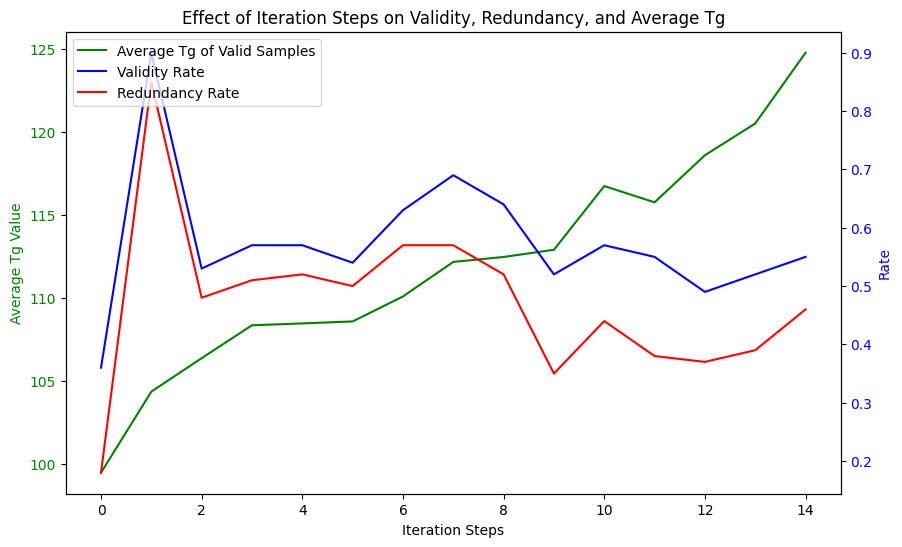

In [ ]:
import matplotlib.pyplot as plt
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Average Tg on the left y-axis
ax1.plot(generations, average_Tg, label='Average Tg of Valid Samples', color='g')
ax1.set_xlabel('Iteration Steps')
ax1.set_ylabel('Average Tg Value', color='g')
ax1.tick_params(axis='y', labelcolor='g')
ax1.set_title('Effect of Iteration Steps on Validity, Redundancy, and Average Tg')

# Using a second y-axis for Validity and Redundancy rates
ax2 = ax1.twinx()
ax2.plot(generations, validity, label='Validity Rate', color='b')
ax2.plot(generations, redundancy, label='Redundancy Rate', color='r')
ax2.set_ylabel('Rate', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Adding a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

Now we can use t-SNE to plot the chemical space distribution of the newly generated hypothetical structures alongside the PolyInfo dataset.

In [ ]:
from sklearn.manifold import TSNE
import time

collector.dropna(subset=['Tg'], inplace=True)
Trainset = pd.read_csv(path+'PolyInfo.csv')
combined_data = pd.concat([collector['smiles'], Trainset['smiles']],ignore_index=True)
fn = pd.DataFrame(combined_data)['smiles'].apply(Chem.MolFromSmiles).dropna().apply(lambda m: AllChem.GetMorganFingerprintAsBitVect(m, radius=3, nBits=2048))
X_fingerprint_All_Polyinfo = np.array(fn.tolist())
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300,random_state=100)
tsne_results = tsne.fit_transform(X_fingerprint_All_Polyinfo)

collector['TSNE 1'] = tsne_results[:collector.shape[0], 0]
collector['TSNE 2'] = tsne_results[:collector.shape[0], 1]
Trainset['TSNE 1'] = tsne_results[collector.shape[0]:, 0]
Trainset['TSNE 2'] = tsne_results[collector.shape[0]:, 1]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 13704 samples in 0.011s...
[t-SNE] Computed neighbors for 13704 samples in 25.168s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13704
[t-SNE] Computed conditional probabilities for sample 2000 / 13704
[t-SNE] Computed conditional probabilities for sample 3000 / 13704
[t-SNE] Computed conditional probabilities for sample 4000 / 13704
[t-SNE] Computed conditional probabilities for sample 5000 / 13704
[t-SNE] Computed conditional probabilities for sample 6000 / 13704
[t-SNE] Computed conditional probabilities for sample 7000 / 13704
[t-SNE] Computed conditional probabilities for sample 8000 / 13704
[t-SNE] Computed conditional probabilities for sample 9000 / 13704
[t-SNE] Computed conditional probabilities for sample 10000 / 13704
[t-SNE] Computed conditional probabilities for sample 11000 / 13704
[t-SNE] Computed conditional probabilities for sample 12000 / 13704
[t-SNE] Computed conditional probabilities for s

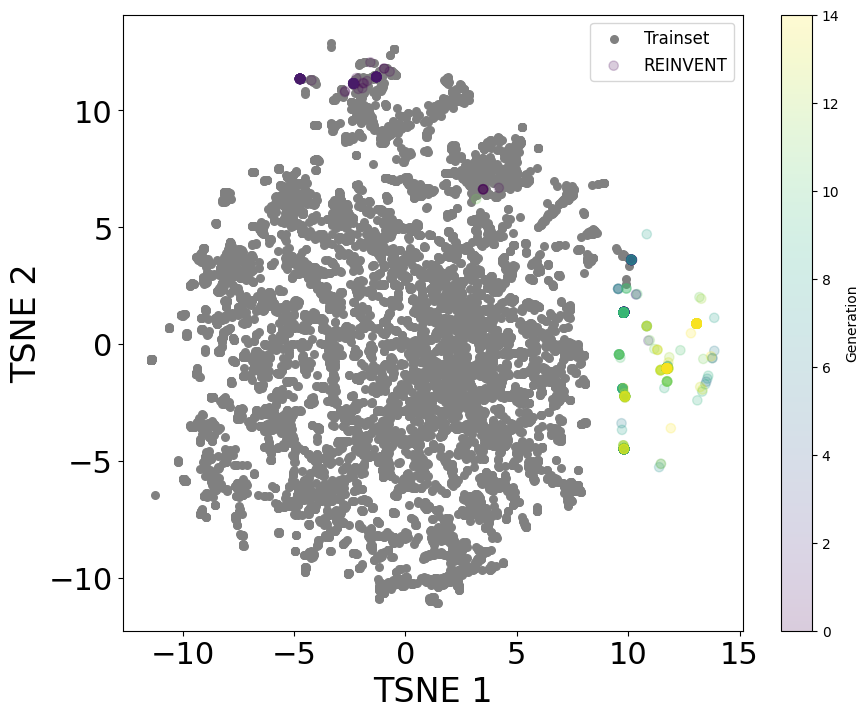

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_reinvent = collector['TSNE 1']
y_reinvent = collector['TSNE 2']

x_trainset = Trainset['TSNE 1']
y_trainset = Trainset['TSNE 2']

generation = collector['generation']

alpha = 0.2

fig = plt.figure(figsize=(10, 8))
plt.scatter(x_trainset, y_trainset, c='gray', s=30, alpha=1, marker='o', label='Trainset')
plt.scatter(x_reinvent, y_reinvent, c=generation, cmap='viridis', s=45, alpha=alpha, marker='o', label='REINVENT')
plt.colorbar(label='Generation')
plt.xlabel('TSNE 1', fontsize=24)
plt.ylabel('TSNE 2', fontsize=24)
plt.legend(fontsize=12)
plt.tick_params(axis='both', labelsize=22)
plt.show()